# Задание

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

In [3]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
name2question = data.iloc[0] 

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

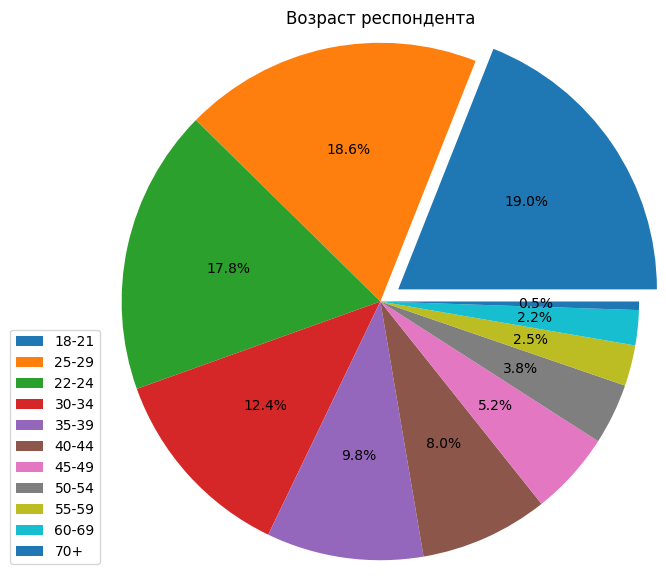

In [4]:
# Код тут
x = data.iloc[1:].groupby(['Q2']).size().sort_values(ascending=False)
plt.figure(figsize = (7,7))
plt.pie(x, autopct='%0.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), radius=1.2)
plt.legend(x.index, loc="lower left", fontsize=10, bbox_to_anchor=(-0.2, 0))
plt.title("Возраст респондента")
plt.show()

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

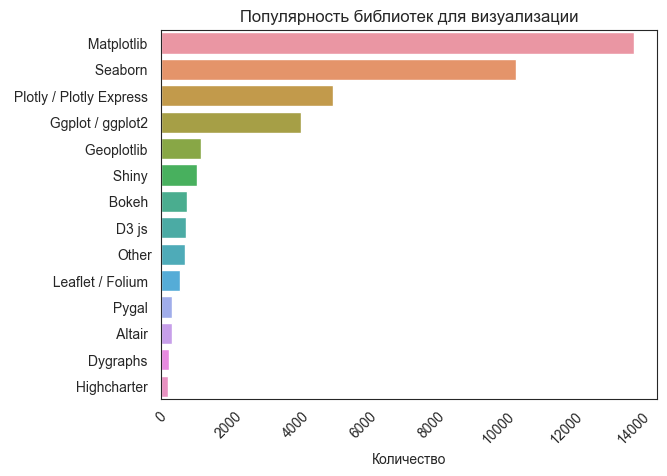

In [5]:
# Код тут
data_ = data.drop(["Q15_14"], axis=1)
sns.set_style('white')
y = data_[[column for column in data_.columns if column.startswith("Q15")]].iloc[1:].melt().groupby(["value"]).size().\
sort_values(ascending=False).values
x = data_[[column for column in data_.columns if column.startswith("Q15")]].iloc[1:].melt().groupby(["value"]).size().\
sort_values(ascending=False).index
ax = sns.barplot(x=y, y=x).set(title='Популярность библиотек для визуализации', xlabel="Количество", ylabel="")
plt.xticks(rotation=45)
plt.show()

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

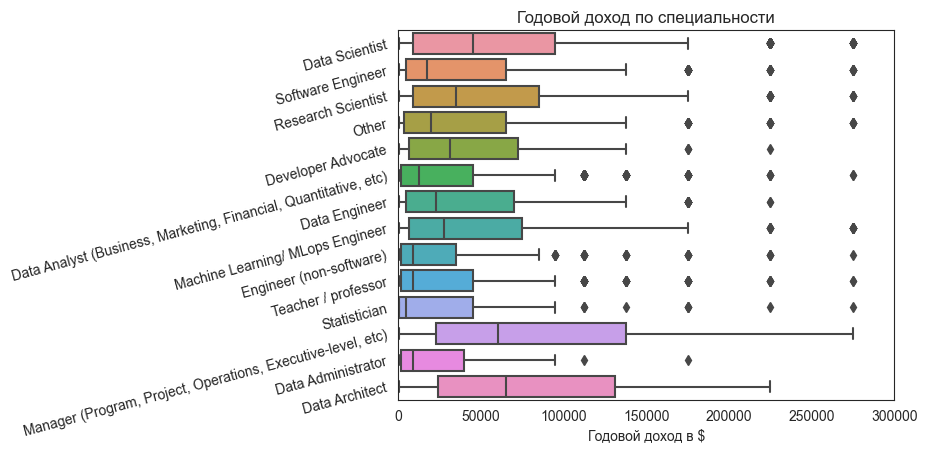

In [6]:
# Код тут
data = data[(data["Q23"] != "Currently not employed")]
sns.set_style('white')
job_ = data["Q23"].iloc[1:]
data_ = data["Q29"].dropna().iloc[1:].replace(["$0-999"], "0-999").replace(["$500,000-999,999"], "500,000-999,999"). \
            replace([">$1,000,000"], "1,000000-1,000000")
dic = {}
for i in range(0, len(data_)):
    revenue_ = data_.iloc[i].replace(",", "").split("-")
    dic[data_.iloc[i]] = ((float(revenue_[0])+float(revenue_[1]))/2)
dt_ = data_.map(dic)
ax = sns.boxplot(x=dt_, y=job_, data=data). \
set(xlabel='Годовой доход в $', ylabel='', title='Годовой доход по специальности', xlim = (0,300000))
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":10, "lines.linewidth": 0.5}, \
                font_scale=0.75,)
plt.yticks(rotation=15)
plt.show()

## Задание 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [37]:
# Код тут
import plotly.graph_objects as go # we can not use express plots
from plotly.subplots import make_subplots # creating subplots

data_adm = data[["Q2"]].dropna()[(data["Q23"] == "Data Administrator")].value_counts().sort_values(ascending=False)
data_ana = data[["Q2"]].dropna()[(data["Q23"] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)")].value_counts().sort_values(ascending=False)
data_eng = data[["Q2"]].dropna()[(data["Q23"] == "Data Engineer")].value_counts().sort_values(ascending=False)
data_sci = data[["Q2"]].dropna()[(data["Q23"] == "Data Scientist")].value_counts().sort_values(ascending=False)
engin = data[["Q2"]].dropna()[(data["Q23"] == "Engineer (non-software)")].value_counts().sort_values(ascending=False)
ml_eng = data[["Q2"]].dropna()[(data["Q23"] == "Machine Learning/ MLops Engineer")].value_counts().sort_values(ascending=False)
res_sci = data[["Q2"]].dropna()[(data["Q23"] == "Research Scientist")].value_counts().sort_values(ascending=False)
soft_eng = data[["Q2"]].dropna()[(data["Q23"] == "Software Engineer")].value_counts().sort_values(ascending=False)
data_arc = data[["Q2"]].dropna()[(data["Q23"] == "Data Architect")].value_counts().sort_values(ascending=False)


d = {"Data Administrator": data_adm, "Data Analyst": data_ana, "Data Engineer" : data_eng, \
     "Data Scientist": data_sci,"Engineer (non-software": engin, "Machine Learning/ MLops Engineer": ml_eng, \
     "Research Scientist":res_sci, "Software Engineer": soft_eng, "Data Architect": data_arc}
df = pd.DataFrame(data=d)
fig = make_subplots(rows=3, cols=3, subplot_titles=["<span style='font-style:italic;font-weight:bold;'>Data Administrator</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Data Analyst</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Data Engineer</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Data Scientist</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Engineer</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>MLops Engineer</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Research Scientist</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Software Engineer</span>", \
                                                    "<span style='font-style:italic;font-weight:bold;'>Data Architect</span>"])
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Data Administrator"], name="Data Administrator"),row=1, col=1)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Data Analyst"], name="Data Analyst"),row=1, col=2)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Data Engineer"], name="Data Engineer"),row=1, col=3)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Data Scientist"], name="Data Scientist"),row=2, col=1)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Engineer (non-software"], name="Engineer"),row=2, col=2)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Machine Learning/ MLops Engineer"], name="Machine Learning/ MLops Engineer"),row=2, col=3)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Research Scientist"], name="Research Scientist"),row=3, col=1)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Software Engineer"], name="Software Engineer"),row=3, col=2)
fig.add_trace(go.Bar(x=df.index.get_level_values(0), y=df["Data Architect"], name="Data Architect"),row=3, col=3)
fig.update_layout(height=600, width=1200, title_text="Распределение возрастов по специальностям")
fig.show()


## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [41]:
#Код тут
fig = px.choropleth(locations=data["Q4"].iloc[1:].value_counts().index, locationmode='country names', \
                    scope='world', color=(data["Q4"].iloc[1:].value_counts().values), \
                    color_continuous_scale=["black", "#58287F", "#DC3535", "#FDA769", "beige"])
fig.update_layout(coloraxis_colorbar=dict(
    title="Количество респондентов",
    thicknessmode="pixels",
    lenmode="pixels",
    yanchor="top",y=1,
    ticks="outside",
    tickvals=[0, 1600, 3200, 4800, 6400, 8000],
    ticktext=[0, 200, 400, 600, 800, 1000],
    dtick=5
))
fig.update_layout(height=600, width=900, title_text="Карта Мира", title_x=0.5)
fig.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками.

In [23]:
# Код тут